# <center>Майнор "Интеллектуальный анализ данных"</center>

# <center>Курс "Современные методы машинного обучения"</center>

# <center>Лабораторная работа №1. Ensembles methods </center>

                                                                                                     Кротов Евгений 17ПИ

## Данные

В рамках данной лабораторной работы предлагается проанализировать набор данных о ...

In [479]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from catboost import CatBoostRegressor, cv

In [489]:
data = pd.read_csv("C:\\london_merged.csv")

data.shape
data.head(10)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
7,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
8,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0
9,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3.0,0.0,1.0,3.0


## Часть 1. Предобработка данных (2 балла)

* Выполните необходимые преобразования данных: исправление ошибок, удаление выбросов и пропусков (если это необходимо) , приведение признаков к числовому виду.

* Проведите небольшой EDA анализ и посмотрите как признаки взаимосвязанные между собой и с целевой переменной.

* Feature engineering: создайте новые признаки на основе уже имеющихся.

Как мы видим, timestamp выглядит довольно интересно. Разобьем его на часы, месяцы и дни, ибо год, минуты и секунды везде одинаковые

In [490]:
tmp_date = list(
    map(
        lambda x: (
            datetime.strptime(
                x,
                "%Y-%m-%d %H:%M:%S"
            ).month, 
            datetime.strptime(
                x,
                "%Y-%m-%d %H:%M:%S"
            ).day,
            datetime.strptime(
                x,
                "%Y-%m-%d %H:%M:%S"
            ).hour),
        data.timestamp
    )
)
data['month'], data['day'], data['hour'] = list(zip(*tmp_date))
data.drop(["timestamp"],axis=1, inplace=True)
data.head(10)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,month,day,hour
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,1,4,0
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,1
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,1,4,2
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,1,4,3
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,1,4,4
5,46,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0,1,4,5
6,51,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0,1,4,6
7,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0,1,4,7
8,131,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0,1,4,8
9,301,2.0,-0.5,100.0,9.0,3.0,0.0,1.0,3.0,1,4,9


Тут мы  сразу тюним все параметры, нормализуем их, приводим к одному виду. Тк cnt - целевая, то ее не трогаем, просто в конец запихнем для удобства

In [491]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data.t1)
data["t1_le"]=le.transform(data.t1)
data.drop(["t1"],axis=1, inplace=True)



le.fit(data.t2)
data["t2_le"]=le.transform(data.t2)
data.drop(["t2"],axis=1, inplace=True)



le.fit(data.hum)
data["hum_le"]=le.transform(data.hum)
data.drop(["hum"],axis=1, inplace=True)


le.fit(data.wind_speed)
data["wind_le"]=le.transform(data.wind_speed)
data.drop(["wind_speed"],axis=1, inplace=True)

le.fit(data.weather_code)
data["wcode_le"]=le.transform(data.weather_code)
data.drop(["weather_code"],axis=1, inplace=True)

le.fit(data.is_holiday)
data["holi_le"]=le.transform(data.is_holiday)
data.drop(["is_holiday"],axis=1, inplace=True)

le.fit(data.is_weekend)
data["week_le"]=le.transform(data.is_weekend)
data.drop(["is_weekend"],axis=1, inplace=True)

le.fit(data.season)
data["season_le"]=le.transform(data.season)
data.drop(["season"],axis=1, inplace=True)

le.fit(data.month)
data["month_le"]=le.transform(data.month)
data.drop(["month"],axis=1, inplace=True)

le.fit(data.day)
data["day_le"]=le.transform(data.day)
data.drop(["day"],axis=1, inplace=True)


le.fit(data.hour)
data["hour_le"]=le.transform(data.hour)
data.drop(["hour"],axis=1, inplace=True)

data["CNT"] = data.cnt
data.drop(["cnt"], axis = 1, inplace = True)
data.head(20)


,t1_le,t2_le,hum_le,wind_le,wcode_le,holi_le,week_le,season_le,month_le,day_le,hour_le,CNT
0,9,16,136,10,2,0,1,3,0,3,0,182
1,9,17,136,8,0,0,1,3,0,3,1,138
2,8,17,139,0,0,0,1,3,0,3,2,134
3,7,16,142,0,0,0,1,3,0,3,3,72
4,7,12,136,11,0,0,1,3,0,3,4,47
5,7,16,136,6,0,0,1,3,0,3,5,46
6,5,10,142,12,3,0,1,3,0,3,6,51
7,5,10,142,12,3,0,1,3,0,3,7,75
8,6,10,139,14,3,0,1,3,0,3,8,131
9,7,11,142,16,2,0,1,3,0,3,9,301



* Разбейте данные на три группы - тренировочные, валидационные и тестовые. Далее обучайтесь только на тренировочных, оптимизируйте параметры и сравнивайте на валидационных, а тестовые оставьте для итогового сравнения.

Выведем хитмап с корреляцией признаков

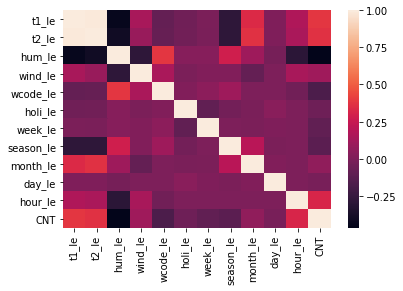

In [492]:
X = data.values[:,:len(data.columns)-1]
Y = data.values[:,len(data.columns)-1]
sns.heatmap(data.corr())


Выводим веса относительно cnt

In [493]:

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()

model.fit(X, Y)

cols = data.columns[:len(data.columns)-1]

df = pd.DataFrame()
df["features"] = cols
df["weights"] = model.feature_importances_
df = df.sort_values(by="weights",ascending = False)

df

,features,weights
3,wind_le,0.174854
2,hum_le,0.141252
9,day_le,0.139378
10,hour_le,0.138759
1,t2_le,0.120668
0,t1_le,0.113154
8,month_le,0.065972
4,wcode_le,0.065297
7,season_le,0.027715
6,week_le,0.008109


Покажем на графике, чтобы было все наглядно

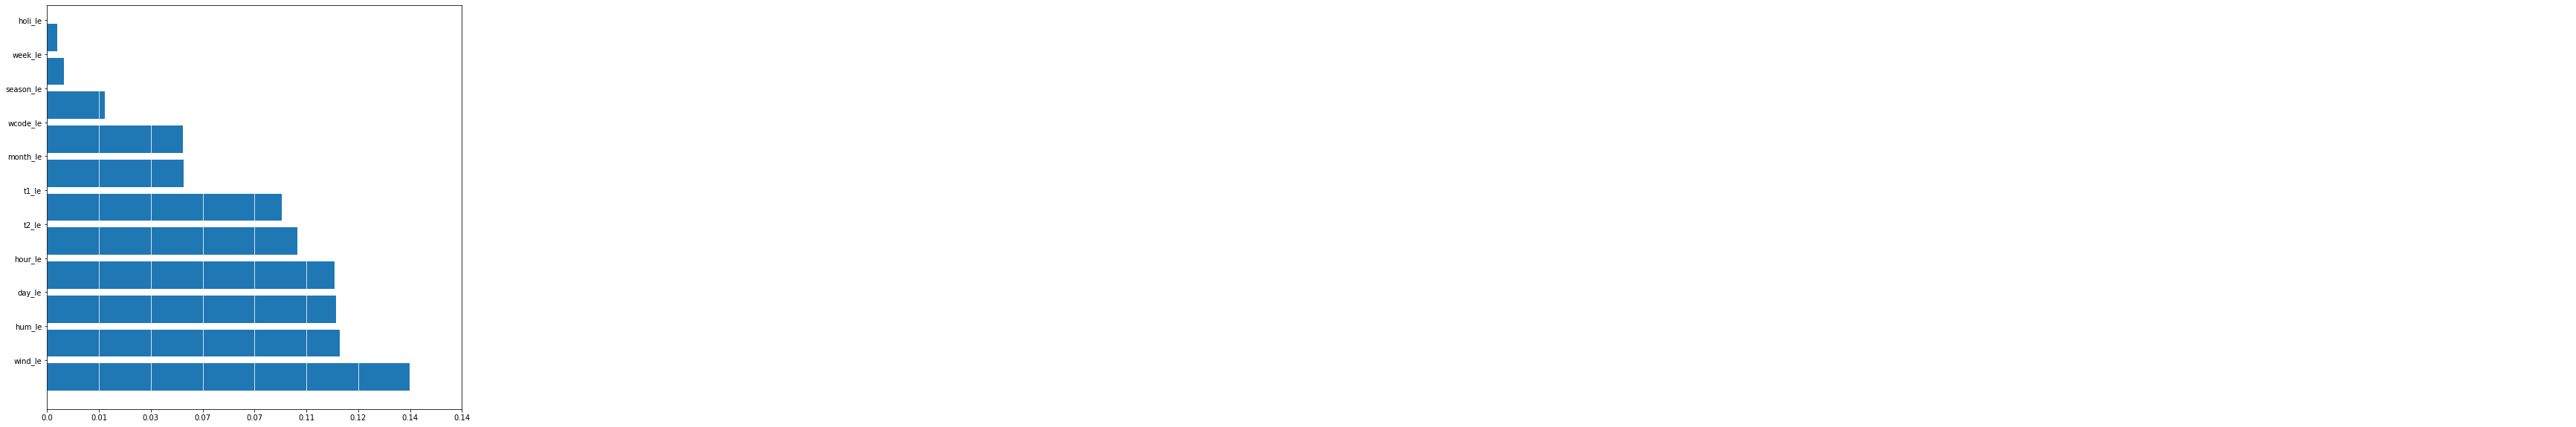

1.0

In [494]:

grad = pd.DataFrame({'weights' : df["weights"], 'features': df["features"]})

plt.figure(figsize=(10, 10))

weights = grad.weights[grad.weights > 0]
features = grad.features[grad.weights > 0]
pos = np.arange(len(df["weights"]))

plt.barh(pos, df["weights"])

for p, c, ch in zip(pos, features, weights):
    plt.annotate(str(ch), xy=(ch + 1, p + .5), va='center')

#customize ticks
ticks = plt.yticks(pos + .5, features)
xt = plt.xticks()[0]
plt.xticks(xt, [round(x, 2) for x in weights[::-1]]) 

plt.grid(axis = 'x', color ='white', linestyle='-')

plt.show()

sum(weights)

уберем малозначимые признаки


In [495]:
flag = 0
for i in range(len(df.values)):
    if(flag < 0.64):
        flag = flag + df["weights"][i]
    else: 
        break 
print(i)

df = df.iloc[i:]
print(df)
data.drop([x for x in df["features"]], axis=1, inplace=True)
data.head(10)

8
    features   weights
7  season_le  0.027715
6    week_le  0.008109
5    holi_le  0.004840


,t1_le,t2_le,hum_le,wind_le,wcode_le,month_le,day_le,hour_le,CNT
0,9,16,136,10,2,0,3,0,182
1,9,17,136,8,0,0,3,1,138
2,8,17,139,0,0,0,3,2,134
3,7,16,142,0,0,0,3,3,72
4,7,12,136,11,0,0,3,4,47
5,7,16,136,6,0,0,3,5,46
6,5,10,142,12,3,0,3,6,51
7,5,10,142,12,3,0,3,7,75
8,6,10,139,14,3,0,3,8,131
9,7,11,142,16,2,0,3,9,301


Новый хитмап, уже после удаления

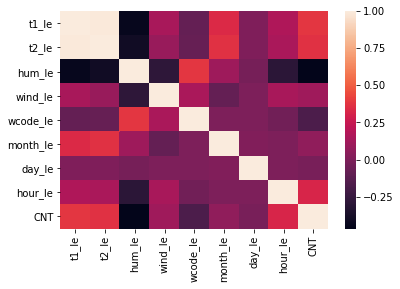

In [496]:
X1 = data.values[:,:len(data.columns)-1]
Y1 = data.values[:,len(data.columns)-1]
sns.heatmap(data.corr())


И наконец-то разбиваем на 3 группы

In [497]:
y, x = data.CNT, data.drop('CNT', axis=1)
train_X, test_X, train_Y, test_Y  = train_test_split(x, y, train_size=0.8, random_state=1999)

train_X, valid_X, train_Y, valid_Y = train_test_split(train_X, train_Y, train_size=0.7, random_state=1999)
train_X.shape, valid_X.shape, test_X.shape

((9751, 8), (4180, 8), (3483, 8))

## Часть 2. Регрессия **(8 баллов)**

* Решите задачу регрессии: Сравните следующие алгоритмы: 
    - Линейную модель (Ridge Regression, Lasso Regression,SVM)
    - Decision trees,
    - Random Forest, 
    - Adaboost 
    - и градиентные бустинг (xgboost, catboost или lightgbm на выбор).  
* Используйте для оценки моделей *MAE, MSE, RMSE, R2, MAPE* метрики.

* Решите задачу регрессии, использовав алгоритмы "из коробки" не прибегая к тюнингу параметров **(4 балла)**. 
 * Оцените качество каждой модели. Сравните значение метрики качества на тренировочном датасете (по кросс валидации) и валидационной выборке. Сделайте наблюдения по поведению метрик. Какие плюсы и минусы есть у каждой метрики?
    * Постройте графики предсказания для всех алгоритмов. Сделайте наблюдения, объясните различие в предсказаниях моделей разной природы. Дают ли ансамбли лучший результат?
    * Отобразите важность признаков (feature importance). Можно ли объяснить логически связь между важными признаками и целевой метрикой?
    * Насколько ухудшится качество моделей, если убрать 3 самых незначимых признака?
    * Насколько отличается качество **линейных моделей** если числовые признаки нормализованы (приведены к одному масштабу) и не нормализованы?
    * Насколько отличается качество **"деревянных" моделей** если числовые признаки нормализованы и не нормализованы? Почему?
* На основе полученных метрик выберите алгоритм для дальнейшего исследования.    
* Найдите параметры модели, которые дают наилучшие результаты согласно выбранной метрики качества, на валидационной выборке **(1 балла)**
* Проверьте результаты на тестовой выборке **(1 балла)**
* Сделайте выводы на основе сравнения качества моделей **(2 балла)**
   

Сделаем функцию, чтобы не копипастить кучу кода как в Label Encoder. Здесь же сразу будем отображать метрики
Будем отображать обработанный датасет сразу с "сырым"

In [498]:
def printMetrics(estimator, prediction, valid_Y, cross_val_dt1, cross_val_dt2, **kwargs):
    plt.plot(prediction[1:100], 'r-', label='Predicted')
    plt.plot(valid_Y[1:100].values, 'b-', label='Correct')
    plt.xlabel(kwargs.get('x_label', "Test observations"))
    plt.ylabel(kwargs.get('y_label'))
    plt.title(kwargs.get('title', 'Linear regression'))
    plt.legend(loc='best')
    plt.show()
    
    MSE = metrics.mean_squared_error(y_pred=prediction, y_true=valid_Y) 
    RMSE = np.sqrt(MSE)
    MAE = metrics.mean_absolute_error(y_pred=prediction, y_true=valid_Y)
    MEDIAN = metrics.median_absolute_error(y_pred=prediction, y_true=valid_Y)
    R2 = metrics.r2_score(y_pred=prediction, y_true=valid_Y)
    
    shape_train, shape_valid = cross_val_dt1.shape, cross_val_dt2.shape 
    estimated_len = min(shape_train[0], shape_valid[0])
    scores=cross_val_score(estimator, cross_val_dt1.iloc[:estimated_len], cross_val_dt2[:estimated_len])

    print("Metrics:")
    print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedian: {}".format(MSE, RMSE, R2, MAE, MEDIAN))
    print(scores)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Продублируем датасет, но уже не будет тюнить, только timestamp переведем в инт, а то совсем не запустится

In [526]:
raw_data = pd.read_csv("C:\\london_merged.csv")


In [527]:
raw_data.shape

raw_data['timestamp'] = list(
    map(
        lambda x: datetime.strptime(
            x,
            "%Y-%m-%d %H:%M:%S"
        ).timestamp(), 
        raw_data.timestamp
    )
)

y1, x1 = raw_data.cnt, raw_data.drop('cnt', axis=1)
train_X1, test_X1, train_Y1, test_Y1,  = train_test_split(x1, y1, train_size=0.8, random_state=1999)
train_X1, valid_X1, train_Y1, valid_Y1 = train_test_split(train_X1, train_Y1, train_size=0.7, random_state=1999)
train_X1.shape, valid_X1.shape, test_X1.shape

((9751, 9), (4180, 9), (3483, 9))

Выведем графики согласно заданию, метрики будем выводить здесь же

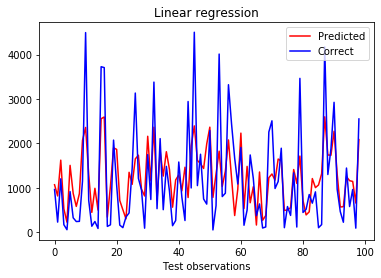

Metrics:
MSE:   842708.6840743809
RMSE:  917.9916579546793
R2:    0.2841675682618754
MAE:   670.1493608133565
Median: 511.65112438406055
[0.32134957 0.27961451 0.29264989]
Accuracy: 0.30 (+/- 0.03)


In [528]:
lmodel = linear_model.LinearRegression()
lmodel.fit(train_X, train_Y)
prediction = lmodel.predict(valid_X)
printMetrics(lmodel, prediction, valid_Y, train_X, train_Y)

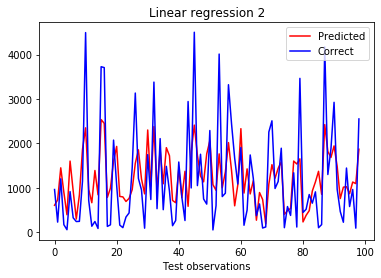

Metrics:
MSE:   873006.6235598652
RMSE:  934.3482346319627
R2:    0.2584312158207339
MAE:   700.1588659151292
Median: 554.5218422725383
[0.28692417 0.25457403 0.27659869]
Accuracy: 0.27 (+/- 0.03)


In [529]:
lmodel = linear_model.LinearRegression()
lmodel.fit(train_X1, train_Y1)
prediction = lmodel.predict(valid_X1)
printMetrics(lmodel, prediction, valid_Y1, train_X1, train_Y1, title="Linear regression 2")

качество модели немного ухудшилось. Например, метрики RMSE и MSE увеличились, R2 упала на 0.02. Модуль отклонения увеличился. Медиана сместилась вверх. В итоге получилось так, что параметры нужно тюнить для получения более качественной модели


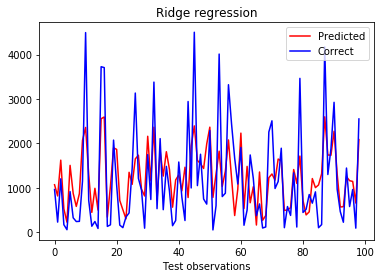

Metrics:
MSE:   842708.8304490984
RMSE:  917.9917376801919
R2:    0.2841674439249937
MAE:   670.1492104988914
Median: 511.64684577287306
[0.32135032 0.27961512 0.29264937]
Accuracy: 0.30 (+/- 0.03)


In [530]:
rmodel = linear_model.RidgeCV(alphas=np.array(range(0, 50, 1))/10, cv=5, scoring='neg_mean_squared_error')    
rmodel.fit(train_X, train_Y)   
prediction = rmodel.predict(valid_X)
printMetrics(rmodel, prediction, valid_Y, train_X, train_Y, title="Ridge regression")

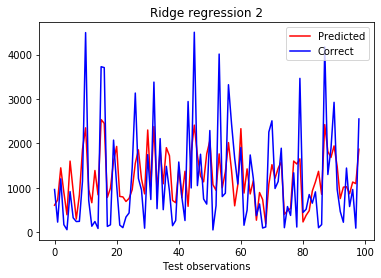

Metrics:
MSE:   873012.8424512743
RMSE:  934.351562556233
R2:    0.25842593323109864
MAE:   700.1499708158989
Median: 554.4156787834828
[0.28692814 0.25457338 0.27660342]
Accuracy: 0.27 (+/- 0.03)


In [531]:
rmodel = linear_model.RidgeCV(alphas=np.array(range(0, 50, 1))/10, cv=5, scoring='neg_mean_squared_error')    
rmodel.fit(train_X1, train_Y1)   
prediction = rmodel.predict(valid_X1)
printMetrics(rmodel, prediction, valid_Y1, train_X1, train_Y1, title="Ridge regression 2")

Наблюдаем аналогичную картину, что и в линейной регрессии.

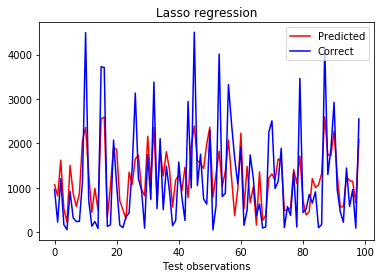

Metrics:
MSE:   842724.2520989632
RMSE:  918.0001373087932
R2:    0.28415434412273366
MAE:   670.1407168609838
Median: 510.8392463266267
[0.32137751 0.27962966 0.29241767]
Accuracy: 0.30 (+/- 0.03)


In [532]:
lmodel = linear_model.LassoCV(alphas=np.array(range(1, 5000, 1))/10, cv=5)
lmodel.fit(train_X, train_Y)     
prediction = lmodel.predict(valid_X)
printMetrics(lmodel, prediction, valid_Y, train_X, train_Y, title="Lasso regression")
#Лассо можно было бы сделать и поинтереснее, но пк вывозит только так

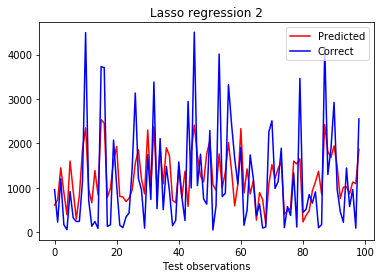

Metrics:
MSE:   873032.3318278478
RMSE:  934.3619918574641
R2:    0.258409378129568
MAE:   700.1367391978118
Median: 554.1172023623473
[0.28693252 0.25457332 0.27660357]
Accuracy: 0.27 (+/- 0.03)


In [533]:
lmodel = linear_model.LassoCV(alphas=np.array(range(1, 5000, 1))/10, cv=5)
lmodel.fit(train_X1, train_Y1)    
prediction = lmodel.predict(valid_X1)
printMetrics(lmodel, prediction, valid_Y1, train_X1, train_Y1, title="Lasso regression 2")

то же, что и в предыдущих регрессиях

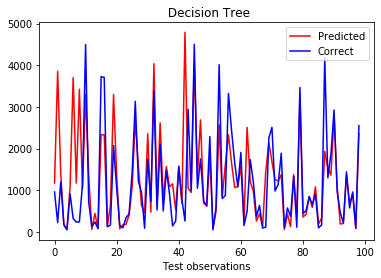

Metrics:
MSE:   398202.9921585459
RMSE:  631.0332734163436
R2:    0.6617495208141347
MAE:   363.3359009480358
Median: 185.78571428571428
[0.67644873 0.68825447 0.65977631]
Accuracy: 0.67 (+/- 0.02)


In [534]:
dt = DecisionTreeRegressor(max_depth=10)
dt.fit(train_X, train_Y)
prediction = dt.predict(valid_X)
printMetrics(dt, prediction, valid_Y, train_X, train_Y, title=" Decision Tree")

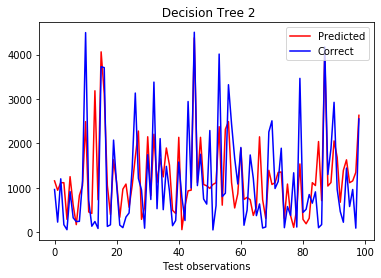

Metrics:
MSE:   934337.8579006485
RMSE:  966.6115341235322
R2:    0.2063338689565729
MAE:   686.2044426662147
Median: 472.44985322896275
[0.17327005 0.1625375  0.19819406]
Accuracy: 0.18 (+/- 0.03)


In [535]:
dt = DecisionTreeRegressor(max_depth=10)
dt.fit(train_X1, train_Y1)
prediction = dt.predict(valid_X1)
printMetrics(dt, prediction, valid_Y1, train_X1, train_Y1, title=" Decision Tree 2")

без тюна все метрики испортились очень сильно, R2 упала на 0.2, MSE просто взлетела, стала даже больше, чем в регрессиях, что говорит о том, что настройкой датасета мы существенно улучшили модель, уменьшив количество ошибок,RMSE логично увеличилась, средний модуль отклонения без предобработки стал похож на регрессионный

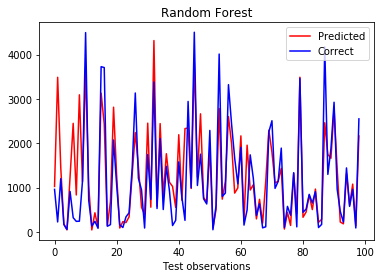

Metrics:
MSE:   316034.00766459334
RMSE:  562.1690205486187
R2:    0.7315473348100408
MAE:   326.53725837320576
Median: 159.10999999999999
[0.74966583 0.74897511 0.7288347 ]
Accuracy: 0.74 (+/- 0.02)


In [536]:
rf = RandomForestRegressor(n_estimators=50, oob_score=True)
rf.fit(train_X, train_Y)
prediction = rf.predict(valid_X)
printMetrics(rf, prediction, valid_Y, train_X, train_Y, title="Random Forest")

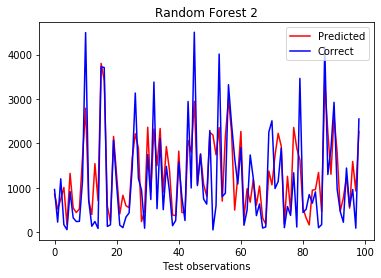

Metrics:
MSE:   759525.1431705263
RMSE:  871.5073970830806
R2:    0.35482718942289126
MAE:   603.7649377990431
Median: 404.46999999999997
[0.34001454 0.33294343 0.32816355]
Accuracy: 0.33 (+/- 0.01)


In [537]:
rf = RandomForestRegressor(n_estimators=50, oob_score=True)
rf.fit(train_X1, train_Y1)
prediction = rf.predict(valid_X1)
printMetrics(rf, prediction, valid_Y1, train_X1, train_Y1, title="Random Forest 2")

Замечаем аналогичную ситуацию. Без предобработки деревья очень сильно просаживаются в плане метрик и предсказаний 

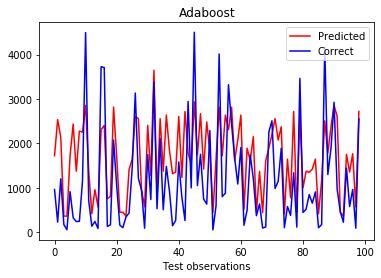

Metrics:
MSE:   711161.9670101382
RMSE:  843.3041960112248
R2:    0.3959089186749114
MAE:   697.7444302223914
Median: 626.8050562239954
[0.48209545 0.5219019  0.48773398]
Accuracy: 0.50 (+/- 0.04)


In [538]:
adb = AdaBoostRegressor(n_estimators=50, learning_rate=1)
adb.fit(train_X, train_Y)
prediction = adb.predict(valid_X)
printMetrics(adb, prediction, valid_Y, train_X, train_Y, title="Adaboost")

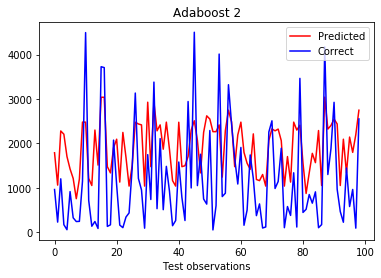

Metrics:
MSE:   1449463.8574039985
RMSE:  1203.9368162009162
R2:    -0.23123596252206902
MAE:   1042.0824693477098
Median: 990.5752985930463
[-0.02114221  0.05128633 -0.25611534]
Accuracy: -0.08 (+/- 0.26)


In [539]:
adb = AdaBoostRegressor(n_estimators=50, learning_rate=1)
adb.fit(train_X1, train_Y1)
prediction = adb.predict(valid_X1)

printMetrics(adb, prediction, valid_Y1, train_X1, train_Y1, title="Adaboost 2")

Adaboost получился на уровне регрессий, но чуть лучше. Ошибок меньше, R2 выше. Но требуется обработка датасета, ибо без нее та же R2 уходит в минус, а MSE и RMSE выходят просто отвратительными. Метрика MAE тоже слишком большая.  

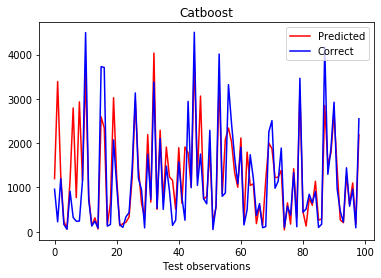

0:	learn: 1080.0251428	total: 3.11ms	remaining: 3.1s
1:	learn: 1062.1499427	total: 5.12ms	remaining: 2.55s
2:	learn: 1047.1548632	total: 7.91ms	remaining: 2.63s
3:	learn: 1029.5167913	total: 10.1ms	remaining: 2.51s
4:	learn: 1013.2699241	total: 12.9ms	remaining: 2.56s
5:	learn: 998.8594923	total: 15.1ms	remaining: 2.5s
6:	learn: 984.4729126	total: 16.9ms	remaining: 2.39s
7:	learn: 970.2624116	total: 18.7ms	remaining: 2.32s
8:	learn: 956.5236005	total: 20.8ms	remaining: 2.29s
9:	learn: 943.6542979	total: 23.7ms	remaining: 2.35s
10:	learn: 931.3802919	total: 27.4ms	remaining: 2.47s
11:	learn: 919.9597932	total: 29.3ms	remaining: 2.41s
12:	learn: 909.2244291	total: 31.1ms	remaining: 2.36s
13:	learn: 897.2764304	total: 32.9ms	remaining: 2.32s
14:	learn: 884.2241002	total: 34.7ms	remaining: 2.28s
15:	learn: 875.0873884	total: 37ms	remaining: 2.28s
16:	learn: 864.3503811	total: 39.3ms	remaining: 2.27s
17:	learn: 853.0707300	total: 42.1ms	remaining: 2.3s
18:	learn: 842.8879683	total: 44ms	rem

202:	learn: 536.9951774	total: 482ms	remaining: 1.89s
203:	learn: 536.8106025	total: 486ms	remaining: 1.9s
204:	learn: 536.0185089	total: 490ms	remaining: 1.9s
205:	learn: 535.6947595	total: 492ms	remaining: 1.9s
206:	learn: 535.5263026	total: 494ms	remaining: 1.89s
207:	learn: 534.9687929	total: 497ms	remaining: 1.89s
208:	learn: 534.6705926	total: 500ms	remaining: 1.89s
209:	learn: 534.4635514	total: 503ms	remaining: 1.89s
210:	learn: 534.3316821	total: 507ms	remaining: 1.9s
211:	learn: 534.2132684	total: 509ms	remaining: 1.89s
212:	learn: 533.9786484	total: 510ms	remaining: 1.89s
213:	learn: 533.8513815	total: 512ms	remaining: 1.88s
214:	learn: 533.4653004	total: 516ms	remaining: 1.88s
215:	learn: 533.1201876	total: 519ms	remaining: 1.88s
216:	learn: 533.0319593	total: 523ms	remaining: 1.89s
217:	learn: 532.8762756	total: 525ms	remaining: 1.88s
218:	learn: 532.8136089	total: 527ms	remaining: 1.88s
219:	learn: 532.5399927	total: 530ms	remaining: 1.88s
220:	learn: 532.3275429	total: 5

416:	learn: 502.0846755	total: 972ms	remaining: 1.36s
417:	learn: 501.9641742	total: 974ms	remaining: 1.36s
418:	learn: 501.8276366	total: 976ms	remaining: 1.35s
419:	learn: 501.6401616	total: 980ms	remaining: 1.35s
420:	learn: 501.3948933	total: 983ms	remaining: 1.35s
421:	learn: 501.3274669	total: 985ms	remaining: 1.35s
422:	learn: 501.0970771	total: 988ms	remaining: 1.35s
423:	learn: 500.8011531	total: 995ms	remaining: 1.35s
424:	learn: 500.6756828	total: 998ms	remaining: 1.35s
425:	learn: 500.5661062	total: 1s	remaining: 1.35s
426:	learn: 500.4936642	total: 1s	remaining: 1.34s
427:	learn: 500.3787208	total: 1s	remaining: 1.34s
428:	learn: 500.2695900	total: 1s	remaining: 1.34s
429:	learn: 500.1545508	total: 1.01s	remaining: 1.34s
430:	learn: 500.0586720	total: 1.01s	remaining: 1.33s
431:	learn: 499.9988962	total: 1.01s	remaining: 1.33s
432:	learn: 499.8343484	total: 1.02s	remaining: 1.33s
433:	learn: 499.7292932	total: 1.02s	remaining: 1.33s
434:	learn: 499.5674670	total: 1.02s	rem

614:	learn: 478.9895783	total: 1.46s	remaining: 915ms
615:	learn: 478.8306180	total: 1.46s	remaining: 912ms
616:	learn: 478.7665611	total: 1.47s	remaining: 912ms
617:	learn: 478.6992656	total: 1.47s	remaining: 910ms
618:	learn: 478.6476072	total: 1.48s	remaining: 908ms
619:	learn: 478.5968973	total: 1.48s	remaining: 906ms
620:	learn: 478.4851028	total: 1.48s	remaining: 904ms
621:	learn: 478.3499869	total: 1.48s	remaining: 901ms
622:	learn: 478.2614634	total: 1.48s	remaining: 898ms
623:	learn: 478.1587571	total: 1.49s	remaining: 896ms
624:	learn: 478.0173500	total: 1.49s	remaining: 894ms
625:	learn: 477.8935300	total: 1.49s	remaining: 891ms
626:	learn: 477.4773835	total: 1.49s	remaining: 889ms
627:	learn: 477.3495919	total: 1.5s	remaining: 886ms
628:	learn: 477.2622238	total: 1.5s	remaining: 883ms
629:	learn: 477.2544900	total: 1.5s	remaining: 881ms
630:	learn: 477.1643357	total: 1.5s	remaining: 878ms
631:	learn: 476.7977554	total: 1.5s	remaining: 876ms
632:	learn: 476.7478794	total: 1.

819:	learn: 459.5695608	total: 1.95s	remaining: 428ms
820:	learn: 459.4210572	total: 1.95s	remaining: 426ms
821:	learn: 459.3497459	total: 1.96s	remaining: 424ms
822:	learn: 459.3125700	total: 1.96s	remaining: 421ms
823:	learn: 459.1812253	total: 1.96s	remaining: 419ms
824:	learn: 459.0550551	total: 1.96s	remaining: 416ms
825:	learn: 458.9138223	total: 1.96s	remaining: 414ms
826:	learn: 458.7980544	total: 1.97s	remaining: 412ms
827:	learn: 458.6472589	total: 1.97s	remaining: 410ms
828:	learn: 458.4987006	total: 1.99s	remaining: 411ms
829:	learn: 458.3930299	total: 2.04s	remaining: 417ms
830:	learn: 458.1031317	total: 2.04s	remaining: 416ms
831:	learn: 457.9647430	total: 2.05s	remaining: 413ms
832:	learn: 457.8397517	total: 2.05s	remaining: 411ms
833:	learn: 457.7904353	total: 2.05s	remaining: 408ms
834:	learn: 457.7140453	total: 2.05s	remaining: 406ms
835:	learn: 457.5932509	total: 2.06s	remaining: 403ms
836:	learn: 457.5528916	total: 2.06s	remaining: 401ms
837:	learn: 457.4878619	tota

993:	learn: 444.2854996	total: 2.43s	remaining: 14.7ms
994:	learn: 444.2031497	total: 2.44s	remaining: 12.2ms
995:	learn: 444.1693344	total: 2.44s	remaining: 9.79ms
996:	learn: 444.0959066	total: 2.44s	remaining: 7.35ms
997:	learn: 444.0205491	total: 2.44s	remaining: 4.9ms
998:	learn: 443.9711783	total: 2.45s	remaining: 2.45ms
999:	learn: 443.8981323	total: 2.45s	remaining: 0us
0:	learn: 1068.8402367	total: 2.29ms	remaining: 2.29s
1:	learn: 1052.4517376	total: 4.33ms	remaining: 2.16s
2:	learn: 1035.1740534	total: 6.35ms	remaining: 2.11s
3:	learn: 1017.5403938	total: 9.3ms	remaining: 2.32s
4:	learn: 1001.9212905	total: 11.1ms	remaining: 2.21s
5:	learn: 987.4808289	total: 12.9ms	remaining: 2.14s
6:	learn: 972.4215710	total: 14.7ms	remaining: 2.08s
7:	learn: 958.0209029	total: 17ms	remaining: 2.11s
8:	learn: 944.3337115	total: 19.8ms	remaining: 2.17s
9:	learn: 932.2021706	total: 22ms	remaining: 2.17s
10:	learn: 919.9963789	total: 23.7ms	remaining: 2.13s
11:	learn: 908.8026199	total: 25.5m

199:	learn: 536.8999798	total: 425ms	remaining: 1.7s
200:	learn: 536.7774808	total: 427ms	remaining: 1.7s
201:	learn: 536.6204605	total: 428ms	remaining: 1.69s
202:	learn: 536.5023346	total: 431ms	remaining: 1.69s
203:	learn: 536.3458107	total: 434ms	remaining: 1.69s
204:	learn: 535.8912264	total: 437ms	remaining: 1.69s
205:	learn: 535.7230405	total: 438ms	remaining: 1.69s
206:	learn: 535.5095893	total: 440ms	remaining: 1.69s
207:	learn: 535.4013762	total: 442ms	remaining: 1.68s
208:	learn: 535.0909541	total: 445ms	remaining: 1.68s
209:	learn: 534.6424752	total: 448ms	remaining: 1.69s
210:	learn: 534.4638634	total: 451ms	remaining: 1.69s
211:	learn: 534.3240662	total: 453ms	remaining: 1.68s
212:	learn: 534.2249324	total: 455ms	remaining: 1.68s
213:	learn: 534.0180746	total: 456ms	remaining: 1.68s
214:	learn: 533.7733400	total: 458ms	remaining: 1.67s
215:	learn: 533.3560958	total: 462ms	remaining: 1.68s
216:	learn: 533.1165443	total: 463ms	remaining: 1.67s
217:	learn: 533.0148303	total:

414:	learn: 503.4160503	total: 908ms	remaining: 1.28s
415:	learn: 503.2088667	total: 909ms	remaining: 1.28s
416:	learn: 503.1101475	total: 912ms	remaining: 1.27s
417:	learn: 502.8612377	total: 913ms	remaining: 1.27s
418:	learn: 502.7833004	total: 915ms	remaining: 1.27s
419:	learn: 502.6695034	total: 918ms	remaining: 1.27s
420:	learn: 502.5997507	total: 921ms	remaining: 1.27s
421:	learn: 502.4592552	total: 923ms	remaining: 1.26s
422:	learn: 502.3868514	total: 924ms	remaining: 1.26s
423:	learn: 502.2089884	total: 926ms	remaining: 1.26s
424:	learn: 502.1100315	total: 928ms	remaining: 1.25s
425:	learn: 502.0587431	total: 930ms	remaining: 1.25s
426:	learn: 502.0429987	total: 932ms	remaining: 1.25s
427:	learn: 501.8940672	total: 939ms	remaining: 1.25s
428:	learn: 501.6688238	total: 941ms	remaining: 1.25s
429:	learn: 501.6168424	total: 943ms	remaining: 1.25s
430:	learn: 501.5586666	total: 945ms	remaining: 1.25s
431:	learn: 501.4821794	total: 947ms	remaining: 1.25s
432:	learn: 501.0136076	tota

576:	learn: 485.6348510	total: 1.23s	remaining: 901ms
577:	learn: 485.5331546	total: 1.23s	remaining: 899ms
578:	learn: 485.3777134	total: 1.23s	remaining: 896ms
579:	learn: 485.2430199	total: 1.23s	remaining: 894ms
580:	learn: 485.2289750	total: 1.24s	remaining: 892ms
581:	learn: 485.1526451	total: 1.24s	remaining: 889ms
582:	learn: 485.0727485	total: 1.24s	remaining: 887ms
583:	learn: 484.9624781	total: 1.24s	remaining: 885ms
584:	learn: 484.8807683	total: 1.24s	remaining: 882ms
585:	learn: 484.7409057	total: 1.25s	remaining: 880ms
586:	learn: 484.6117231	total: 1.25s	remaining: 877ms
587:	learn: 484.5066849	total: 1.25s	remaining: 875ms
588:	learn: 484.4336198	total: 1.25s	remaining: 873ms
589:	learn: 484.3956739	total: 1.25s	remaining: 870ms
590:	learn: 484.2414129	total: 1.25s	remaining: 868ms
591:	learn: 484.1681719	total: 1.26s	remaining: 866ms
592:	learn: 484.0616945	total: 1.26s	remaining: 864ms
593:	learn: 483.9705226	total: 1.26s	remaining: 861ms
594:	learn: 483.8670684	tota

782:	learn: 463.4157452	total: 1.71s	remaining: 473ms
783:	learn: 463.3282218	total: 1.71s	remaining: 471ms
784:	learn: 463.2386320	total: 1.71s	remaining: 469ms
785:	learn: 463.1516123	total: 1.71s	remaining: 467ms
786:	learn: 463.0625354	total: 1.72s	remaining: 465ms
787:	learn: 463.0556110	total: 1.72s	remaining: 463ms
788:	learn: 463.0461026	total: 1.72s	remaining: 460ms
789:	learn: 462.9876790	total: 1.72s	remaining: 458ms
790:	learn: 462.9490850	total: 1.72s	remaining: 456ms
791:	learn: 462.9407255	total: 1.73s	remaining: 454ms
792:	learn: 462.8831724	total: 1.73s	remaining: 452ms
793:	learn: 462.7510469	total: 1.73s	remaining: 449ms
794:	learn: 462.7313866	total: 1.73s	remaining: 447ms
795:	learn: 462.6466338	total: 1.74s	remaining: 445ms
796:	learn: 462.6048301	total: 1.74s	remaining: 443ms
797:	learn: 462.5496331	total: 1.74s	remaining: 441ms
798:	learn: 462.4753393	total: 1.74s	remaining: 438ms
799:	learn: 462.3748575	total: 1.75s	remaining: 436ms
800:	learn: 462.3554414	tota

936:	learn: 450.4887294	total: 2.03s	remaining: 137ms
937:	learn: 450.3934530	total: 2.03s	remaining: 134ms
938:	learn: 450.3037155	total: 2.04s	remaining: 132ms
939:	learn: 450.2510065	total: 2.04s	remaining: 130ms
940:	learn: 450.1787086	total: 2.04s	remaining: 128ms
941:	learn: 450.1073813	total: 2.04s	remaining: 126ms
942:	learn: 450.0681295	total: 2.04s	remaining: 123ms
943:	learn: 450.0514456	total: 2.04s	remaining: 121ms
944:	learn: 449.9866794	total: 2.05s	remaining: 119ms
945:	learn: 449.8335021	total: 2.05s	remaining: 117ms
946:	learn: 449.7499282	total: 2.05s	remaining: 115ms
947:	learn: 449.6540496	total: 2.05s	remaining: 113ms
948:	learn: 449.6422263	total: 2.05s	remaining: 110ms
949:	learn: 449.5800008	total: 2.06s	remaining: 108ms
950:	learn: 449.5409615	total: 2.06s	remaining: 106ms
951:	learn: 449.5060729	total: 2.06s	remaining: 104ms
952:	learn: 449.4449454	total: 2.06s	remaining: 102ms
953:	learn: 449.3112089	total: 2.06s	remaining: 99.5ms
954:	learn: 449.2509969	tot

156:	learn: 532.9474350	total: 323ms	remaining: 1.73s
157:	learn: 532.7644378	total: 324ms	remaining: 1.73s
158:	learn: 532.5530263	total: 327ms	remaining: 1.73s
159:	learn: 532.2457170	total: 330ms	remaining: 1.73s
160:	learn: 532.0659624	total: 332ms	remaining: 1.73s
161:	learn: 531.8504034	total: 333ms	remaining: 1.72s
162:	learn: 531.5163364	total: 335ms	remaining: 1.72s
163:	learn: 531.3834883	total: 337ms	remaining: 1.72s
164:	learn: 531.2625661	total: 339ms	remaining: 1.71s
165:	learn: 531.0434324	total: 341ms	remaining: 1.71s
166:	learn: 530.6995223	total: 343ms	remaining: 1.71s
167:	learn: 530.5346140	total: 345ms	remaining: 1.71s
168:	learn: 530.3643080	total: 346ms	remaining: 1.7s
169:	learn: 529.9413504	total: 349ms	remaining: 1.7s
170:	learn: 529.7119532	total: 351ms	remaining: 1.7s
171:	learn: 529.0708845	total: 353ms	remaining: 1.7s
172:	learn: 528.7444907	total: 356ms	remaining: 1.7s
173:	learn: 528.3649423	total: 358ms	remaining: 1.7s
174:	learn: 528.1656277	total: 359

330:	learn: 501.4534650	total: 991ms	remaining: 2s
331:	learn: 501.3153246	total: 995ms	remaining: 2s
332:	learn: 500.9832899	total: 1s	remaining: 2.01s
333:	learn: 500.8699276	total: 1s	remaining: 2s
334:	learn: 500.7405892	total: 1.01s	remaining: 2s
335:	learn: 500.6033432	total: 1.01s	remaining: 2s
336:	learn: 500.2811644	total: 1.01s	remaining: 1.99s
337:	learn: 499.9044943	total: 1.02s	remaining: 1.99s
338:	learn: 499.6532882	total: 1.02s	remaining: 1.99s
339:	learn: 499.5089269	total: 1.02s	remaining: 1.99s
340:	learn: 499.3797856	total: 1.03s	remaining: 1.99s
341:	learn: 499.2542555	total: 1.03s	remaining: 1.98s
342:	learn: 499.1867726	total: 1.06s	remaining: 2.03s
343:	learn: 498.9214134	total: 1.07s	remaining: 2.04s
344:	learn: 498.6110411	total: 1.07s	remaining: 2.04s
345:	learn: 498.4982085	total: 1.07s	remaining: 2.03s
346:	learn: 498.4619214	total: 1.08s	remaining: 2.03s
347:	learn: 498.3497530	total: 1.08s	remaining: 2.02s
348:	learn: 498.0957702	total: 1.08s	remaining: 2

494:	learn: 478.6131692	total: 1.47s	remaining: 1.5s
495:	learn: 478.4791614	total: 1.47s	remaining: 1.49s
496:	learn: 478.3808551	total: 1.47s	remaining: 1.49s
497:	learn: 478.3173047	total: 1.48s	remaining: 1.49s
498:	learn: 478.2187856	total: 1.48s	remaining: 1.48s
499:	learn: 477.9387064	total: 1.48s	remaining: 1.48s
500:	learn: 477.8345466	total: 1.48s	remaining: 1.48s
501:	learn: 477.7614309	total: 1.49s	remaining: 1.47s
502:	learn: 477.6618847	total: 1.49s	remaining: 1.47s
503:	learn: 477.5740057	total: 1.49s	remaining: 1.47s
504:	learn: 477.5041063	total: 1.49s	remaining: 1.47s
505:	learn: 477.3553373	total: 1.5s	remaining: 1.46s
506:	learn: 477.3286281	total: 1.5s	remaining: 1.46s
507:	learn: 477.2024753	total: 1.5s	remaining: 1.45s
508:	learn: 476.9340832	total: 1.5s	remaining: 1.45s
509:	learn: 476.8260834	total: 1.51s	remaining: 1.45s
510:	learn: 476.7447135	total: 1.51s	remaining: 1.44s
511:	learn: 476.6078512	total: 1.51s	remaining: 1.44s
512:	learn: 476.5261810	total: 1.

688:	learn: 458.1855954	total: 1.94s	remaining: 875ms
689:	learn: 457.9841444	total: 1.94s	remaining: 872ms
690:	learn: 457.8457408	total: 1.94s	remaining: 869ms
691:	learn: 457.8015269	total: 1.94s	remaining: 866ms
692:	learn: 457.7545867	total: 1.95s	remaining: 863ms
693:	learn: 457.7120525	total: 1.95s	remaining: 860ms
694:	learn: 457.5503029	total: 1.95s	remaining: 856ms
695:	learn: 457.4319714	total: 1.95s	remaining: 854ms
696:	learn: 457.2603292	total: 1.96s	remaining: 851ms
697:	learn: 457.0544994	total: 1.96s	remaining: 848ms
698:	learn: 456.9585247	total: 1.96s	remaining: 845ms
699:	learn: 456.8446491	total: 1.96s	remaining: 842ms
700:	learn: 456.7706924	total: 1.97s	remaining: 839ms
701:	learn: 456.6918214	total: 1.97s	remaining: 835ms
702:	learn: 456.6278917	total: 1.97s	remaining: 832ms
703:	learn: 456.5272169	total: 1.97s	remaining: 829ms
704:	learn: 456.4561934	total: 1.97s	remaining: 826ms
705:	learn: 456.3626540	total: 1.98s	remaining: 823ms
706:	learn: 456.3238674	tota

847:	learn: 443.7177716	total: 2.43s	remaining: 435ms
848:	learn: 443.6017487	total: 2.43s	remaining: 432ms
849:	learn: 443.4842403	total: 2.43s	remaining: 429ms
850:	learn: 443.4015442	total: 2.43s	remaining: 426ms
851:	learn: 443.3517090	total: 2.43s	remaining: 423ms
852:	learn: 443.2773689	total: 2.44s	remaining: 420ms
853:	learn: 443.2272556	total: 2.44s	remaining: 417ms
854:	learn: 443.1123280	total: 2.44s	remaining: 414ms
855:	learn: 442.9368635	total: 2.44s	remaining: 411ms
856:	learn: 442.8488219	total: 2.45s	remaining: 409ms
857:	learn: 442.7479079	total: 2.45s	remaining: 406ms
858:	learn: 442.7169249	total: 2.45s	remaining: 403ms
859:	learn: 442.6977775	total: 2.46s	remaining: 400ms
860:	learn: 442.5212014	total: 2.46s	remaining: 397ms
861:	learn: 442.4286375	total: 2.46s	remaining: 395ms
862:	learn: 442.3502546	total: 2.47s	remaining: 392ms
863:	learn: 442.2691943	total: 2.47s	remaining: 389ms
864:	learn: 442.1966775	total: 2.47s	remaining: 386ms
865:	learn: 442.1375971	tota

In [540]:
ctb = CatBoostRegressor()
ctb.fit(train_X, train_Y, silent=True)
prediction = ctb.predict(valid_X)

printMetrics(ctb, prediction, valid_Y, train_X, train_Y, title="Catboost")

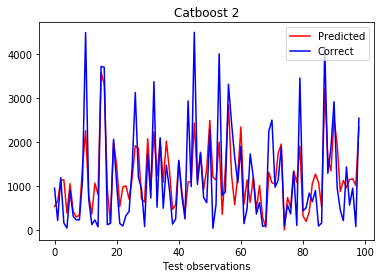

0:	learn: 1090.8662920	total: 3.02ms	remaining: 3.02s
1:	learn: 1083.7582173	total: 5.78ms	remaining: 2.88s
2:	learn: 1076.1669101	total: 8.13ms	remaining: 2.7s
3:	learn: 1068.6780333	total: 10.4ms	remaining: 2.58s
4:	learn: 1062.5314970	total: 12.9ms	remaining: 2.56s
5:	learn: 1056.5480988	total: 15.2ms	remaining: 2.52s
6:	learn: 1050.3046810	total: 17.8ms	remaining: 2.53s
7:	learn: 1044.6387366	total: 20.2ms	remaining: 2.51s
8:	learn: 1039.5218403	total: 23.3ms	remaining: 2.57s
9:	learn: 1034.0470763	total: 25.8ms	remaining: 2.55s
10:	learn: 1028.9219839	total: 32.6ms	remaining: 2.93s
11:	learn: 1023.9400299	total: 35.7ms	remaining: 2.94s
12:	learn: 1018.1769360	total: 39.7ms	remaining: 3.02s
13:	learn: 1013.2279850	total: 42.7ms	remaining: 3.01s
14:	learn: 1008.8859360	total: 45.8ms	remaining: 3.01s
15:	learn: 1004.2940086	total: 48.9ms	remaining: 3s
16:	learn: 1000.4453231	total: 51.8ms	remaining: 2.99s
17:	learn: 996.7811284	total: 54.1ms	remaining: 2.95s
18:	learn: 992.9775214	to

166:	learn: 882.5436993	total: 483ms	remaining: 2.41s
167:	learn: 882.3217694	total: 485ms	remaining: 2.4s
168:	learn: 882.2042072	total: 487ms	remaining: 2.4s
169:	learn: 881.9054009	total: 489ms	remaining: 2.39s
170:	learn: 881.6428719	total: 492ms	remaining: 2.38s
171:	learn: 881.4429060	total: 494ms	remaining: 2.38s
172:	learn: 881.2485032	total: 496ms	remaining: 2.37s
173:	learn: 881.0976829	total: 498ms	remaining: 2.37s
174:	learn: 881.0108302	total: 501ms	remaining: 2.36s
175:	learn: 880.7232882	total: 503ms	remaining: 2.35s
176:	learn: 880.5274173	total: 505ms	remaining: 2.35s
177:	learn: 880.4169806	total: 508ms	remaining: 2.34s
178:	learn: 880.2487492	total: 510ms	remaining: 2.34s
179:	learn: 879.9748532	total: 512ms	remaining: 2.33s
180:	learn: 879.7230440	total: 514ms	remaining: 2.33s
181:	learn: 879.5640948	total: 517ms	remaining: 2.32s
182:	learn: 879.3250667	total: 519ms	remaining: 2.32s
183:	learn: 879.2477319	total: 521ms	remaining: 2.31s
184:	learn: 879.0376597	total:

322:	learn: 860.1968890	total: 1.13s	remaining: 2.38s
323:	learn: 860.0400065	total: 1.14s	remaining: 2.37s
324:	learn: 859.9089317	total: 1.14s	remaining: 2.37s
325:	learn: 859.8005525	total: 1.15s	remaining: 2.37s
326:	learn: 859.6060904	total: 1.16s	remaining: 2.39s
327:	learn: 859.4833141	total: 1.16s	remaining: 2.38s
328:	learn: 859.3584882	total: 1.17s	remaining: 2.38s
329:	learn: 859.2622487	total: 1.17s	remaining: 2.38s
330:	learn: 859.1732425	total: 1.18s	remaining: 2.38s
331:	learn: 859.0514167	total: 1.18s	remaining: 2.38s
332:	learn: 858.8403855	total: 1.19s	remaining: 2.38s
333:	learn: 858.6601175	total: 1.19s	remaining: 2.37s
334:	learn: 858.4905359	total: 1.19s	remaining: 2.36s
335:	learn: 858.3159370	total: 1.19s	remaining: 2.36s
336:	learn: 858.0664825	total: 1.2s	remaining: 2.36s
337:	learn: 857.8082845	total: 1.2s	remaining: 2.36s
338:	learn: 857.7210852	total: 1.21s	remaining: 2.36s
339:	learn: 857.5831766	total: 1.22s	remaining: 2.36s
340:	learn: 857.5071787	total:

480:	learn: 839.2751040	total: 1.78s	remaining: 1.92s
481:	learn: 839.1021766	total: 1.79s	remaining: 1.92s
482:	learn: 838.9352035	total: 1.79s	remaining: 1.91s
483:	learn: 838.8087149	total: 1.79s	remaining: 1.91s
484:	learn: 838.7006577	total: 1.79s	remaining: 1.9s
485:	learn: 838.5656771	total: 1.8s	remaining: 1.91s
486:	learn: 838.4800440	total: 1.81s	remaining: 1.91s
487:	learn: 838.3349532	total: 1.82s	remaining: 1.91s
488:	learn: 838.1703089	total: 1.82s	remaining: 1.91s
489:	learn: 838.0419270	total: 1.83s	remaining: 1.91s
490:	learn: 837.9628263	total: 1.83s	remaining: 1.9s
491:	learn: 837.8719245	total: 1.83s	remaining: 1.9s
492:	learn: 837.6758650	total: 1.84s	remaining: 1.89s
493:	learn: 837.5889904	total: 1.84s	remaining: 1.89s
494:	learn: 837.5331569	total: 1.85s	remaining: 1.89s
495:	learn: 837.4251455	total: 1.85s	remaining: 1.88s
496:	learn: 837.3470120	total: 1.85s	remaining: 1.88s
497:	learn: 837.1558955	total: 1.86s	remaining: 1.87s
498:	learn: 837.0082101	total: 1

679:	learn: 816.4428294	total: 2.43s	remaining: 1.14s
680:	learn: 816.3504141	total: 2.43s	remaining: 1.14s
681:	learn: 816.2239325	total: 2.43s	remaining: 1.13s
682:	learn: 816.0776439	total: 2.44s	remaining: 1.13s
683:	learn: 815.9548496	total: 2.44s	remaining: 1.13s
684:	learn: 815.7604621	total: 2.44s	remaining: 1.12s
685:	learn: 815.6219488	total: 2.44s	remaining: 1.12s
686:	learn: 815.4701677	total: 2.44s	remaining: 1.11s
687:	learn: 815.3520000	total: 2.45s	remaining: 1.11s
688:	learn: 815.2784902	total: 2.45s	remaining: 1.1s
689:	learn: 815.1790847	total: 2.45s	remaining: 1.1s
690:	learn: 815.0353179	total: 2.45s	remaining: 1.1s
691:	learn: 814.9701983	total: 2.46s	remaining: 1.09s
692:	learn: 814.7143941	total: 2.46s	remaining: 1.09s
693:	learn: 814.5950229	total: 2.46s	remaining: 1.08s
694:	learn: 814.5356219	total: 2.46s	remaining: 1.08s
695:	learn: 814.4000443	total: 2.46s	remaining: 1.08s
696:	learn: 814.3004959	total: 2.47s	remaining: 1.07s
697:	learn: 814.2131893	total: 

874:	learn: 796.7714258	total: 2.92s	remaining: 417ms
875:	learn: 796.7537785	total: 2.92s	remaining: 414ms
876:	learn: 796.6866344	total: 2.92s	remaining: 410ms
877:	learn: 796.5440446	total: 2.92s	remaining: 407ms
878:	learn: 796.4451320	total: 2.93s	remaining: 403ms
879:	learn: 796.3544392	total: 2.93s	remaining: 400ms
880:	learn: 796.2654584	total: 2.93s	remaining: 396ms
881:	learn: 796.1564674	total: 2.94s	remaining: 393ms
882:	learn: 795.9893889	total: 2.94s	remaining: 389ms
883:	learn: 795.8361050	total: 2.94s	remaining: 386ms
884:	learn: 795.7647457	total: 2.94s	remaining: 382ms
885:	learn: 795.7303893	total: 2.94s	remaining: 379ms
886:	learn: 795.6506749	total: 2.95s	remaining: 375ms
887:	learn: 795.5668867	total: 2.95s	remaining: 372ms
888:	learn: 795.4375463	total: 2.95s	remaining: 369ms
889:	learn: 795.3689508	total: 2.95s	remaining: 365ms
890:	learn: 795.2123810	total: 2.96s	remaining: 362ms
891:	learn: 795.0371823	total: 2.96s	remaining: 358ms
892:	learn: 794.9779273	tota

63:	learn: 896.3054168	total: 167ms	remaining: 2.44s
64:	learn: 895.6406072	total: 169ms	remaining: 2.43s
65:	learn: 894.9209830	total: 174ms	remaining: 2.46s
66:	learn: 894.1582623	total: 176ms	remaining: 2.45s
67:	learn: 893.4566145	total: 178ms	remaining: 2.44s
68:	learn: 892.6935907	total: 180ms	remaining: 2.43s
69:	learn: 892.1035095	total: 182ms	remaining: 2.42s
70:	learn: 891.4461647	total: 185ms	remaining: 2.42s
71:	learn: 890.7709273	total: 188ms	remaining: 2.42s
72:	learn: 890.1995884	total: 190ms	remaining: 2.41s
73:	learn: 889.4711217	total: 192ms	remaining: 2.4s
74:	learn: 889.0153056	total: 194ms	remaining: 2.39s
75:	learn: 888.5699567	total: 196ms	remaining: 2.39s
76:	learn: 888.0656142	total: 198ms	remaining: 2.38s
77:	learn: 887.5438011	total: 203ms	remaining: 2.39s
78:	learn: 886.9934824	total: 205ms	remaining: 2.39s
79:	learn: 886.3568338	total: 207ms	remaining: 2.38s
80:	learn: 885.9045288	total: 209ms	remaining: 2.37s
81:	learn: 885.3668548	total: 211ms	remaining: 

276:	learn: 846.9030742	total: 661ms	remaining: 1.73s
277:	learn: 846.6822728	total: 665ms	remaining: 1.73s
278:	learn: 846.5340839	total: 668ms	remaining: 1.73s
279:	learn: 846.4108179	total: 670ms	remaining: 1.72s
280:	learn: 846.2507957	total: 672ms	remaining: 1.72s
281:	learn: 846.1268541	total: 674ms	remaining: 1.72s
282:	learn: 845.9840244	total: 676ms	remaining: 1.71s
283:	learn: 845.9327417	total: 679ms	remaining: 1.71s
284:	learn: 845.6975687	total: 681ms	remaining: 1.71s
285:	learn: 845.6660732	total: 683ms	remaining: 1.71s
286:	learn: 845.4530462	total: 685ms	remaining: 1.7s
287:	learn: 845.3044871	total: 687ms	remaining: 1.7s
288:	learn: 845.1517649	total: 690ms	remaining: 1.7s
289:	learn: 845.0004725	total: 693ms	remaining: 1.7s
290:	learn: 844.8813031	total: 695ms	remaining: 1.69s
291:	learn: 844.7272802	total: 698ms	remaining: 1.69s
292:	learn: 844.5960370	total: 700ms	remaining: 1.69s
293:	learn: 844.5538145	total: 702ms	remaining: 1.69s
294:	learn: 844.4260540	total: 7

496:	learn: 822.4229284	total: 1.15s	remaining: 1.16s
497:	learn: 822.2757966	total: 1.15s	remaining: 1.16s
498:	learn: 822.1967871	total: 1.15s	remaining: 1.16s
499:	learn: 822.0359610	total: 1.15s	remaining: 1.15s
500:	learn: 821.9984184	total: 1.16s	remaining: 1.15s
501:	learn: 821.9194526	total: 1.16s	remaining: 1.15s
502:	learn: 821.7545269	total: 1.16s	remaining: 1.15s
503:	learn: 821.5478244	total: 1.16s	remaining: 1.14s
504:	learn: 821.3733240	total: 1.17s	remaining: 1.14s
505:	learn: 821.3562206	total: 1.17s	remaining: 1.14s
506:	learn: 821.1300620	total: 1.17s	remaining: 1.14s
507:	learn: 821.0009335	total: 1.17s	remaining: 1.13s
508:	learn: 820.9844050	total: 1.17s	remaining: 1.13s
509:	learn: 820.9302431	total: 1.18s	remaining: 1.13s
510:	learn: 820.7520833	total: 1.18s	remaining: 1.13s
511:	learn: 820.6293384	total: 1.18s	remaining: 1.12s
512:	learn: 820.5313472	total: 1.18s	remaining: 1.12s
513:	learn: 820.2828281	total: 1.18s	remaining: 1.12s
514:	learn: 820.0801551	tota

650:	learn: 805.8358778	total: 1.48s	remaining: 791ms
651:	learn: 805.7405241	total: 1.48s	remaining: 789ms
652:	learn: 805.5883924	total: 1.48s	remaining: 787ms
653:	learn: 805.4610053	total: 1.48s	remaining: 784ms
654:	learn: 805.3033448	total: 1.48s	remaining: 782ms
655:	learn: 805.2925439	total: 1.49s	remaining: 780ms
656:	learn: 805.1702642	total: 1.49s	remaining: 777ms
657:	learn: 805.1206845	total: 1.49s	remaining: 775ms
658:	learn: 805.0824668	total: 1.49s	remaining: 773ms
659:	learn: 804.9203450	total: 1.5s	remaining: 770ms
660:	learn: 804.9099390	total: 1.5s	remaining: 768ms
661:	learn: 804.8672175	total: 1.5s	remaining: 766ms
662:	learn: 804.7618684	total: 1.5s	remaining: 763ms
663:	learn: 804.6443771	total: 1.5s	remaining: 761ms
664:	learn: 804.6329688	total: 1.51s	remaining: 759ms
665:	learn: 804.5722982	total: 1.51s	remaining: 757ms
666:	learn: 804.4597989	total: 1.51s	remaining: 754ms
667:	learn: 804.4154919	total: 1.51s	remaining: 752ms
668:	learn: 804.2753820	total: 1.

868:	learn: 785.4223128	total: 1.97s	remaining: 297ms
869:	learn: 785.3022172	total: 1.97s	remaining: 294ms
870:	learn: 785.2113493	total: 1.97s	remaining: 292ms
871:	learn: 785.1813026	total: 1.97s	remaining: 290ms
872:	learn: 785.1144029	total: 1.98s	remaining: 288ms
873:	learn: 785.0637938	total: 1.98s	remaining: 285ms
874:	learn: 784.9600241	total: 1.98s	remaining: 283ms
875:	learn: 784.8627236	total: 1.98s	remaining: 281ms
876:	learn: 784.6992656	total: 1.99s	remaining: 279ms
877:	learn: 784.6925274	total: 1.99s	remaining: 276ms
878:	learn: 784.6836203	total: 1.99s	remaining: 274ms
879:	learn: 784.5850175	total: 1.99s	remaining: 272ms
880:	learn: 784.4610345	total: 2s	remaining: 269ms
881:	learn: 784.3808073	total: 2s	remaining: 267ms
882:	learn: 784.2534635	total: 2s	remaining: 265ms
883:	learn: 784.1870724	total: 2s	remaining: 263ms
884:	learn: 784.0906716	total: 2s	remaining: 261ms
885:	learn: 783.9626401	total: 2.01s	remaining: 258ms
886:	learn: 783.8477590	total: 2.01s	remain

52:	learn: 913.2667655	total: 126ms	remaining: 2.25s
53:	learn: 912.0364132	total: 128ms	remaining: 2.24s
54:	learn: 911.1460389	total: 131ms	remaining: 2.25s
55:	learn: 910.2502230	total: 137ms	remaining: 2.3s
56:	learn: 909.4291835	total: 139ms	remaining: 2.3s
57:	learn: 908.6775737	total: 142ms	remaining: 2.3s
58:	learn: 907.8535241	total: 144ms	remaining: 2.29s
59:	learn: 907.2178189	total: 146ms	remaining: 2.29s
60:	learn: 906.5653340	total: 153ms	remaining: 2.35s
61:	learn: 905.8833341	total: 155ms	remaining: 2.34s
62:	learn: 905.2621119	total: 157ms	remaining: 2.34s
63:	learn: 904.6164185	total: 160ms	remaining: 2.34s
64:	learn: 904.0742160	total: 164ms	remaining: 2.36s
65:	learn: 903.4791530	total: 167ms	remaining: 2.36s
66:	learn: 902.8519426	total: 169ms	remaining: 2.35s
67:	learn: 902.2141092	total: 171ms	remaining: 2.35s
68:	learn: 901.4334571	total: 174ms	remaining: 2.34s
69:	learn: 900.8769050	total: 176ms	remaining: 2.33s
70:	learn: 900.2007469	total: 178ms	remaining: 2.

250:	learn: 861.9955220	total: 619ms	remaining: 1.85s
251:	learn: 861.8553832	total: 621ms	remaining: 1.84s
252:	learn: 861.8015404	total: 623ms	remaining: 1.84s
253:	learn: 861.6887227	total: 625ms	remaining: 1.84s
254:	learn: 861.6423648	total: 627ms	remaining: 1.83s
255:	learn: 861.5325292	total: 629ms	remaining: 1.83s
256:	learn: 861.4885910	total: 632ms	remaining: 1.83s
257:	learn: 861.4382844	total: 634ms	remaining: 1.82s
258:	learn: 861.3290698	total: 636ms	remaining: 1.82s
259:	learn: 861.3209621	total: 638ms	remaining: 1.81s
260:	learn: 861.1563564	total: 640ms	remaining: 1.81s
261:	learn: 861.0667714	total: 642ms	remaining: 1.81s
262:	learn: 860.8811314	total: 644ms	remaining: 1.8s
263:	learn: 860.6833459	total: 647ms	remaining: 1.8s
264:	learn: 860.6015742	total: 649ms	remaining: 1.8s
265:	learn: 860.5148718	total: 651ms	remaining: 1.8s
266:	learn: 860.4299608	total: 653ms	remaining: 1.79s
267:	learn: 860.3635854	total: 655ms	remaining: 1.79s
268:	learn: 860.2094617	total: 6

478:	learn: 834.6346723	total: 1.11s	remaining: 1.21s
479:	learn: 834.4275317	total: 1.11s	remaining: 1.21s
480:	learn: 834.3800501	total: 1.11s	remaining: 1.2s
481:	learn: 834.3274430	total: 1.12s	remaining: 1.2s
482:	learn: 834.1913232	total: 1.12s	remaining: 1.2s
483:	learn: 834.0827059	total: 1.12s	remaining: 1.2s
484:	learn: 833.9960245	total: 1.12s	remaining: 1.19s
485:	learn: 833.8948692	total: 1.12s	remaining: 1.19s
486:	learn: 833.8540461	total: 1.13s	remaining: 1.19s
487:	learn: 833.8252491	total: 1.13s	remaining: 1.18s
488:	learn: 833.6396301	total: 1.13s	remaining: 1.18s
489:	learn: 833.5156284	total: 1.13s	remaining: 1.18s
490:	learn: 833.4046425	total: 1.14s	remaining: 1.18s
491:	learn: 833.3722751	total: 1.14s	remaining: 1.17s
492:	learn: 833.1160404	total: 1.14s	remaining: 1.17s
493:	learn: 833.0570990	total: 1.14s	remaining: 1.17s
494:	learn: 832.9261726	total: 1.14s	remaining: 1.17s
495:	learn: 832.9040005	total: 1.15s	remaining: 1.16s
496:	learn: 832.7179838	total: 1

694:	learn: 810.7806983	total: 1.6s	remaining: 704ms
695:	learn: 810.6689834	total: 1.6s	remaining: 701ms
696:	learn: 810.5961163	total: 1.61s	remaining: 699ms
697:	learn: 810.5315576	total: 1.61s	remaining: 696ms
698:	learn: 810.3713902	total: 1.61s	remaining: 694ms
699:	learn: 810.2079055	total: 1.61s	remaining: 692ms
700:	learn: 810.1202761	total: 1.61s	remaining: 689ms
701:	learn: 810.0966063	total: 1.62s	remaining: 687ms
702:	learn: 810.0334351	total: 1.62s	remaining: 684ms
703:	learn: 809.9303320	total: 1.62s	remaining: 682ms
704:	learn: 809.8661674	total: 1.62s	remaining: 680ms
705:	learn: 809.7942104	total: 1.63s	remaining: 678ms
706:	learn: 809.7107862	total: 1.63s	remaining: 675ms
707:	learn: 809.6404579	total: 1.63s	remaining: 673ms
708:	learn: 809.5384270	total: 1.63s	remaining: 670ms
709:	learn: 809.3291770	total: 1.64s	remaining: 668ms
710:	learn: 809.2385905	total: 1.64s	remaining: 666ms
711:	learn: 809.1390667	total: 1.64s	remaining: 663ms
712:	learn: 809.0203639	total:

921:	learn: 790.2665869	total: 2.09s	remaining: 177ms
922:	learn: 790.1003855	total: 2.1s	remaining: 175ms
923:	learn: 789.9878341	total: 2.1s	remaining: 173ms
924:	learn: 789.8658889	total: 2.1s	remaining: 170ms
925:	learn: 789.7962479	total: 2.1s	remaining: 168ms
926:	learn: 789.7081629	total: 2.1s	remaining: 166ms
927:	learn: 789.5829626	total: 2.11s	remaining: 163ms
928:	learn: 789.4644735	total: 2.11s	remaining: 161ms
929:	learn: 789.3733411	total: 2.11s	remaining: 159ms
930:	learn: 789.2451226	total: 2.11s	remaining: 157ms
931:	learn: 789.1320990	total: 2.11s	remaining: 154ms
932:	learn: 789.0685376	total: 2.12s	remaining: 152ms
933:	learn: 788.9750689	total: 2.12s	remaining: 150ms
934:	learn: 788.9469250	total: 2.12s	remaining: 147ms
935:	learn: 788.8540596	total: 2.12s	remaining: 145ms
936:	learn: 788.7872886	total: 2.13s	remaining: 143ms
937:	learn: 788.6061483	total: 2.13s	remaining: 141ms
938:	learn: 788.5653094	total: 2.13s	remaining: 138ms
939:	learn: 788.4917910	total: 2.

In [541]:
ctb = CatBoostRegressor()
ctb.fit(train_X1, train_Y1, silent=True)
prediction = ctb.predict(valid_X1)

printMetrics(ctb, prediction, valid_Y1, train_X1, train_Y1, title="Catboost 2")

Catboost показал себя великолепно, даже без обработки все метрики лучше , нежели были в регрессия с обработкой. С обработкой данный алгоритм следует использовать для дальнейшего исследования. Он более четкий и стабильный.

Проверим результат на тестовой выборке с помощью catbost, поскольку он показал себя лучше всех

In [542]:
def printMetrics1(prediction, test_Y, **kwargs):
    plt.plot(prediction[1:100], 'r-', label='Predicted')
    plt.plot(test_Y[1:100].values, 'b-', label='Correct')
    plt.xlabel(kwargs.get('x_label', "Test observations"))
    plt.ylabel(kwargs.get('y_label'))
    plt.title(kwargs.get('title', 'Catboost_test'))
    plt.legend(loc='best')
    plt.show()
    
    MSE = metrics.mean_squared_error(y_pred=prediction, y_true=test_Y) 
    RMSE = np.sqrt(MSE)
    MAE = metrics.mean_absolute_error(y_pred=prediction, y_true=test_Y)
    MEDIAN = metrics.median_absolute_error(y_pred=prediction, y_true=test_Y)
    R2 = metrics.r2_score(y_pred=prediction, y_true=test_Y)
    
    print("Metrics:")
    print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedian: {}".format(MSE, RMSE, R2, MAE, MEDIAN))

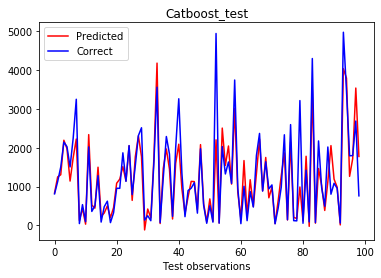

Metrics:
MSE:   282980.81211379333
RMSE:  531.9594083328101
R2:    0.7467431497563961
MAE:   293.42267276216495
Median: 139.14827359133818


In [561]:
cat = CatBoostRegressor(max_depth=10, iterations=5000)
cat.fit(train_X, train_Y, silent=True)
prediction = cat.predict(test_X)

catboost_metrics = printMetrics1(prediction, test_Y, )

поигравшись с метриками, мы смогли добиться практически 0.75 в R2 метрике, если выставить коэффициенты выше, то и результат будет лучше, но у меня просто не хватило памяти на пк 

# Вывод: 
Сразу видно, что если мы не будем тюнить параметры, то метрики получаются менее точными, предсказания заметно хуже. Ансамбли дают лучший результат что с обработкой, что без. Деревья, в отличие от регрессий, более зависимы от обработки метрик, но в целом они проявили себя намного лучше. Catboost по итогу показал себя лучше остальных алгоритмов, точность порядка 35% даже без предобработки датасета, с обработкой лучше (75%). В результате всего вышесказанного, мы можем утверждать, что линейные регрессии показывают себя плохо, ибо предполагают связь между параметрами, деревянные модели же пытаются найти все возможные пути, adaboost прямо указывает на некорректность данных, а catboost является лучшим способ предсказания для данного датасета